In [1]:
from nsimpkg.random_variables import BetaRV, LogitNormalRV
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from tqdm import tqdm
from nsimpkg.mcsim import rho
from nsimpkg.plotting import plot_iters_beta, plot_params_beta, plot_mse
from nsimpkg.beta_OAIS import Adam_OAIS_beta
np.random.seed(0)

plt.rcParams["figure.dpi"] = 300

In [2]:
def phi(x):
    return (np.abs(x-0.5)<0.25).astype(float)
pi = LogitNormalRV(0, 1)
q0 = BetaRV(1, 1)

In [39]:
import nsimpkg.mcsim
# import reload function from importlib
from importlib import reload
reload(nsimpkg.mcsim)
from nsimpkg.mcsim import mcsim
GT = mcsim(phi, pi, N=int(1e8))
GT

0.72815795

In [11]:
import nsimpkg.plotting
# import reload function from importlib
from importlib import reload
reload(nsimpkg.plotting)
from nsimpkg.plotting import plot_params_beta

In [15]:
N = 100
Niter = int(1e4)
alpha = 1e-1
nexperiments = 100
experiment_distributions = []
experiment_results = []
for experiment in range(nexperiments):
    results, distributions = Adam_OAIS_beta(phi, pi, q0, N, Niter, alpha=1e-1)
    experiment_distributions.append(distributions)
    experiment_results.append(results)

100%|██████████| 10000/10000 [00:06<00:00, 1480.86it/s]


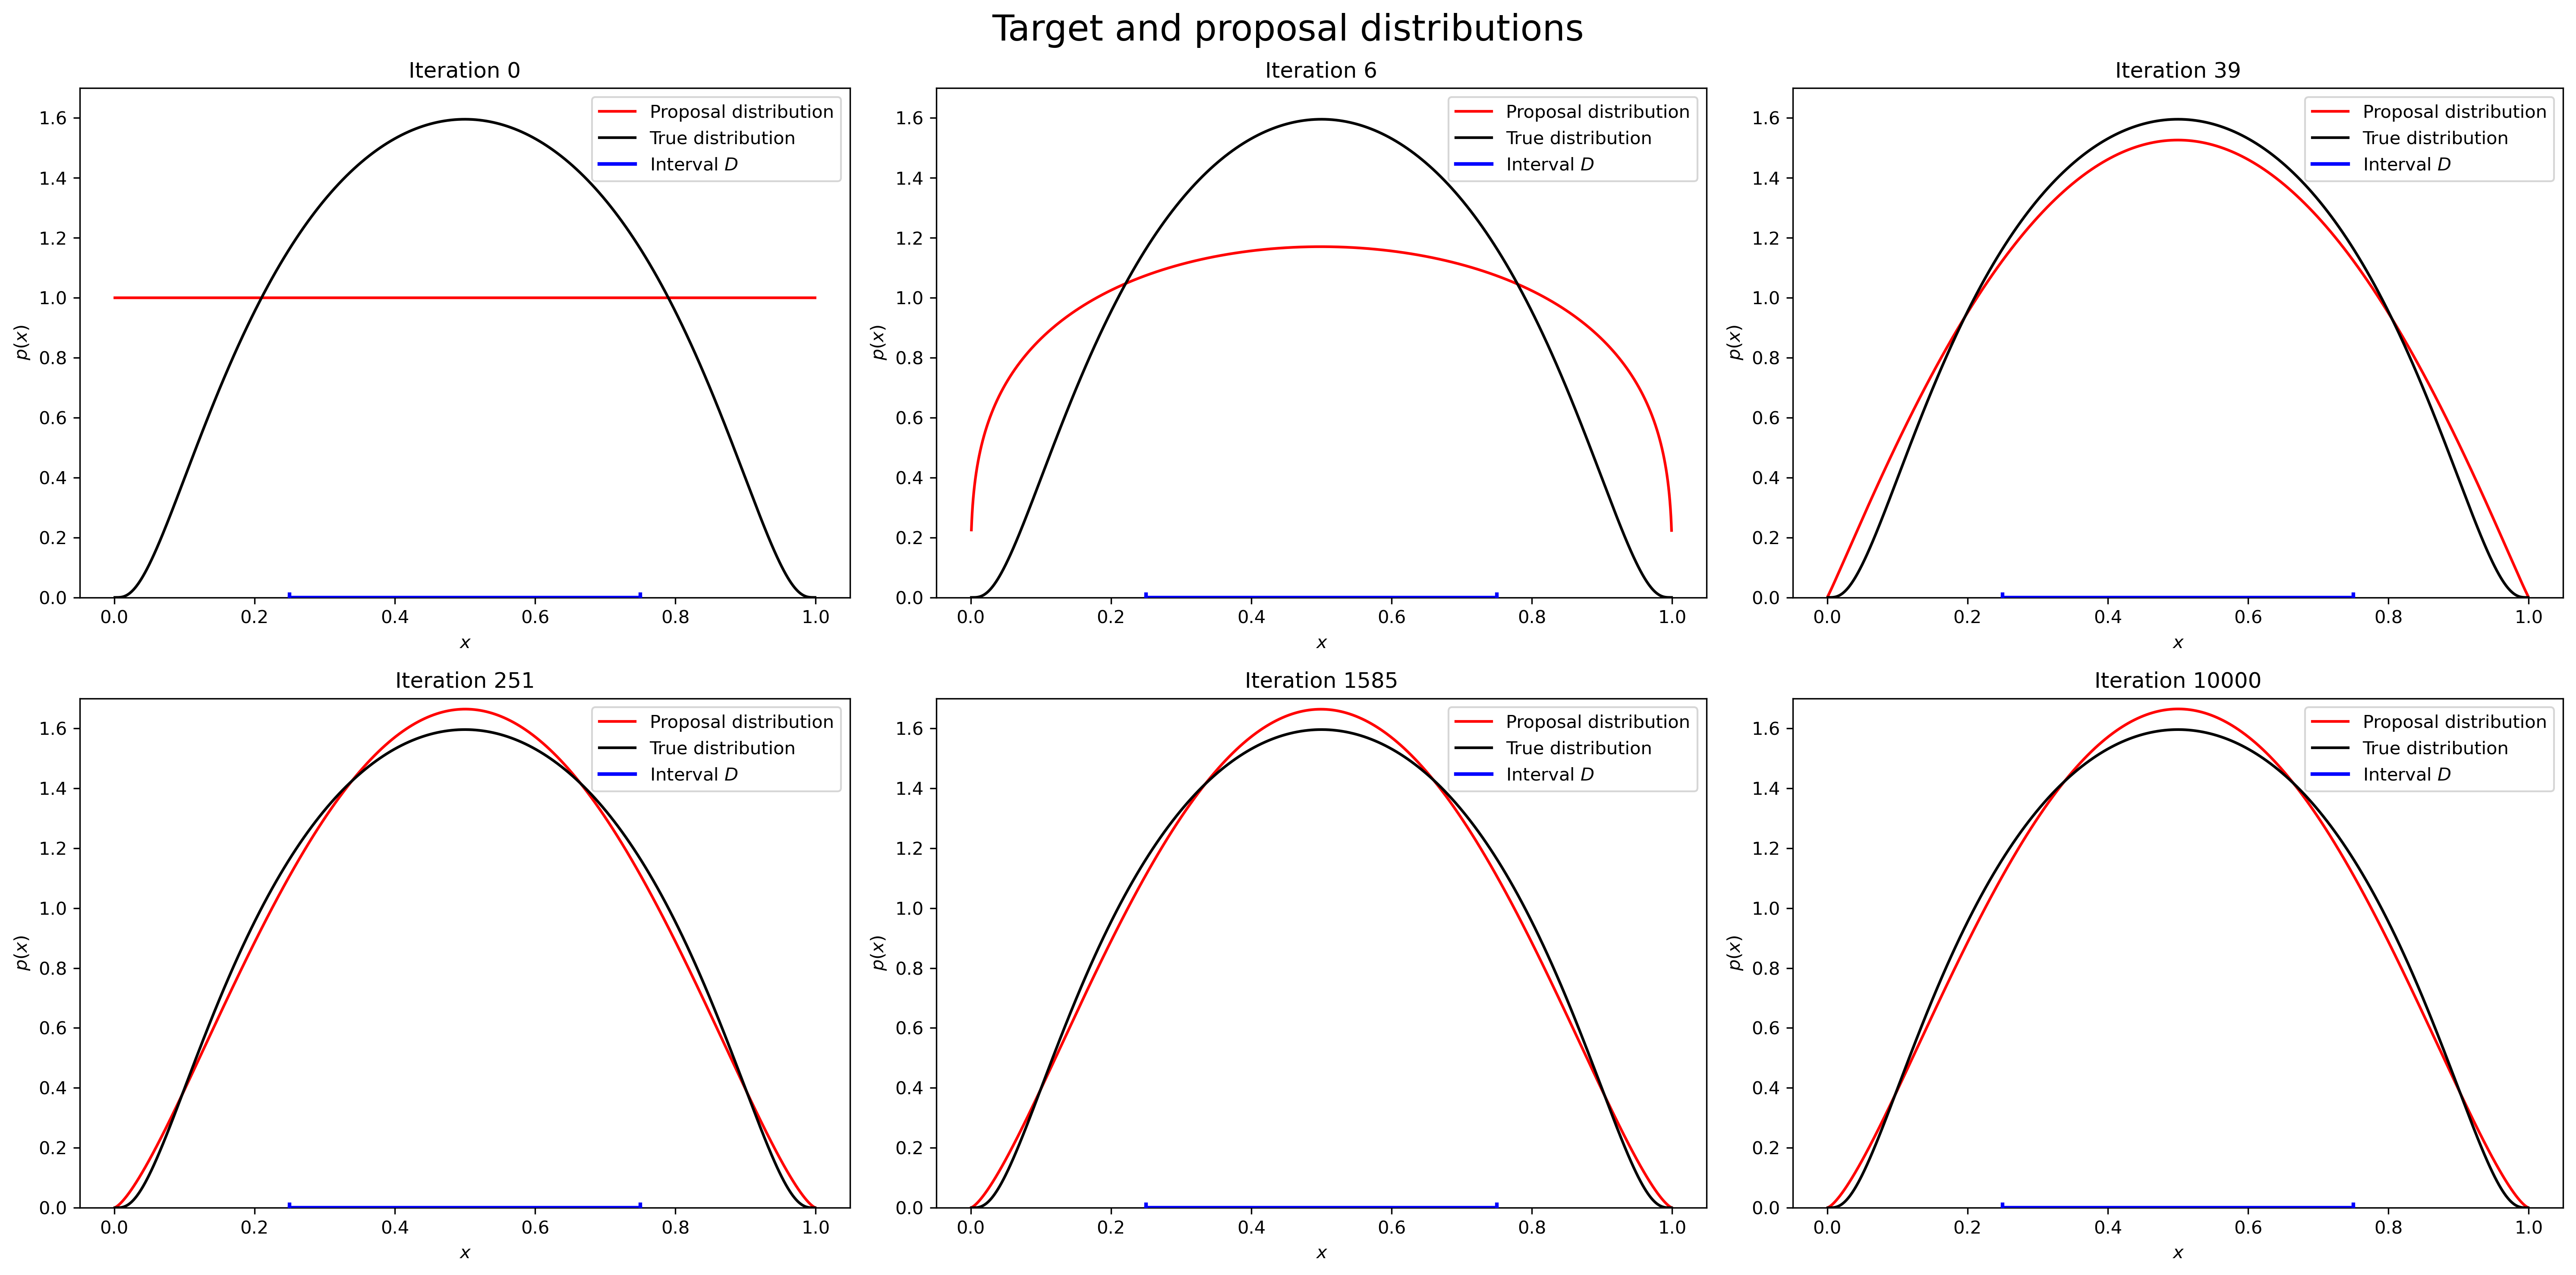

In [41]:
plot_iters_beta(experiment_distributions, pi, "Target and proposal distributions")
plt.savefig("/Users/carlosperello/Desktop/M3R/figs/beta/Adam/iter_proposal.png")

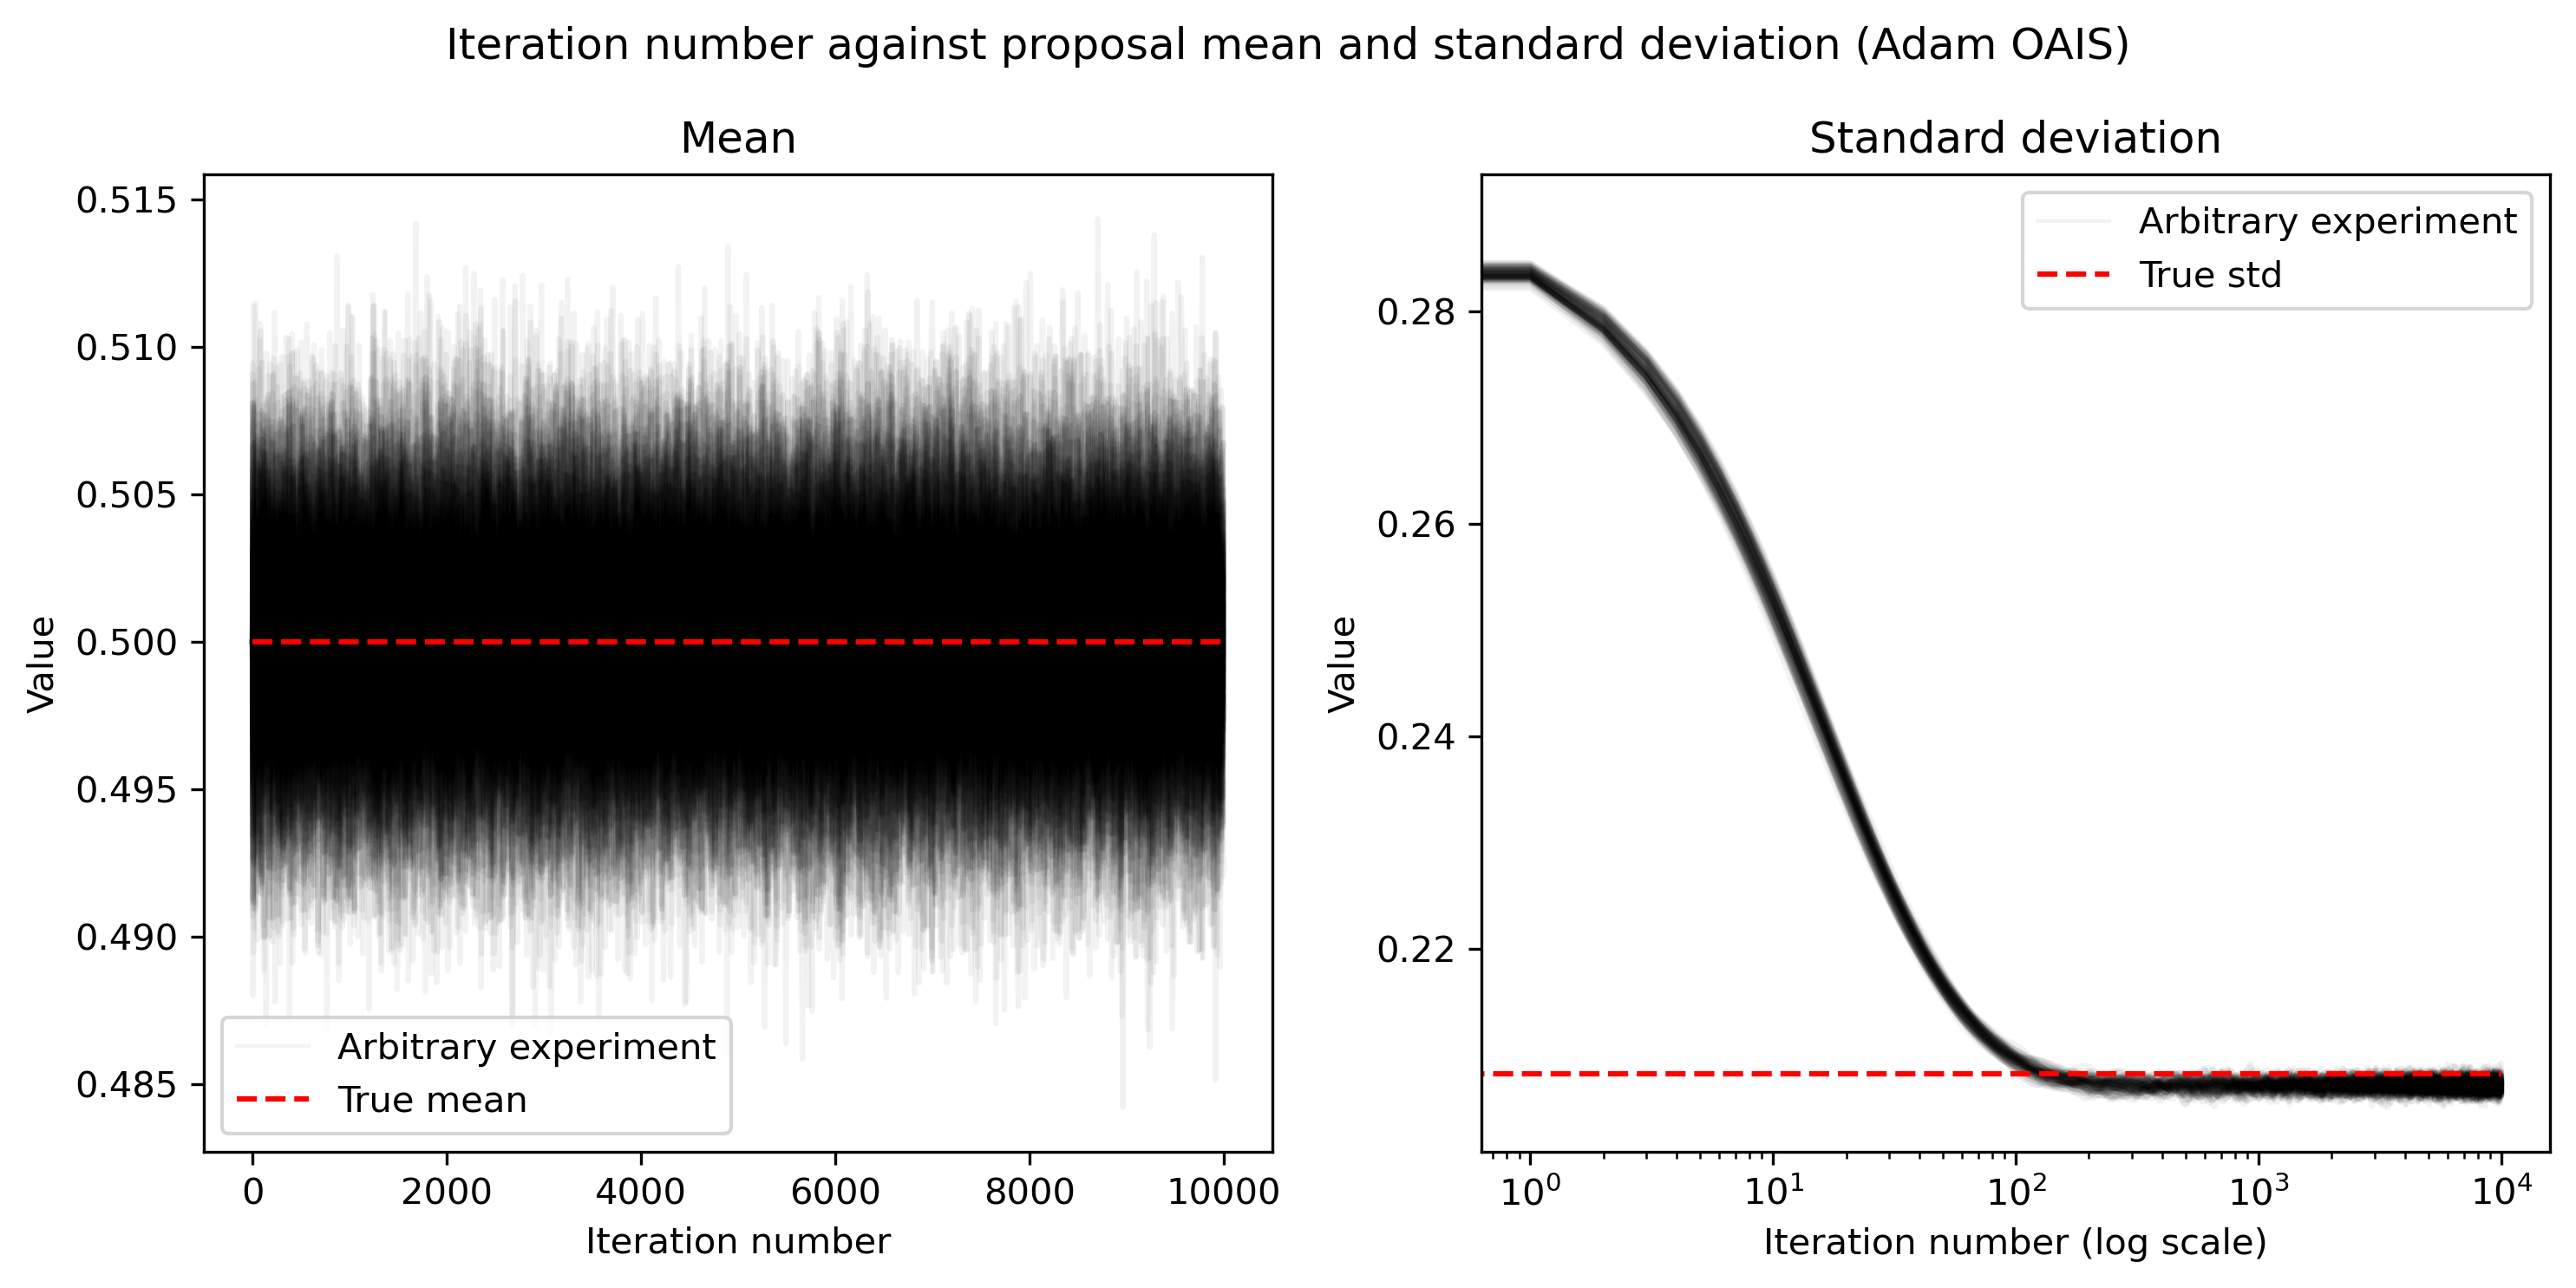

In [42]:
plot_params_beta(experiment_distributions, pi, "Iteration number against proposal mean and standard deviation (Adam OAIS)", mode="gaussian", average=False, Nsamples=int(1e8), alpha=0.05, xlog=True)
plt.savefig("/Users/carlosperello/Desktop/M3R/figs/beta/Adam/moments_all.png")

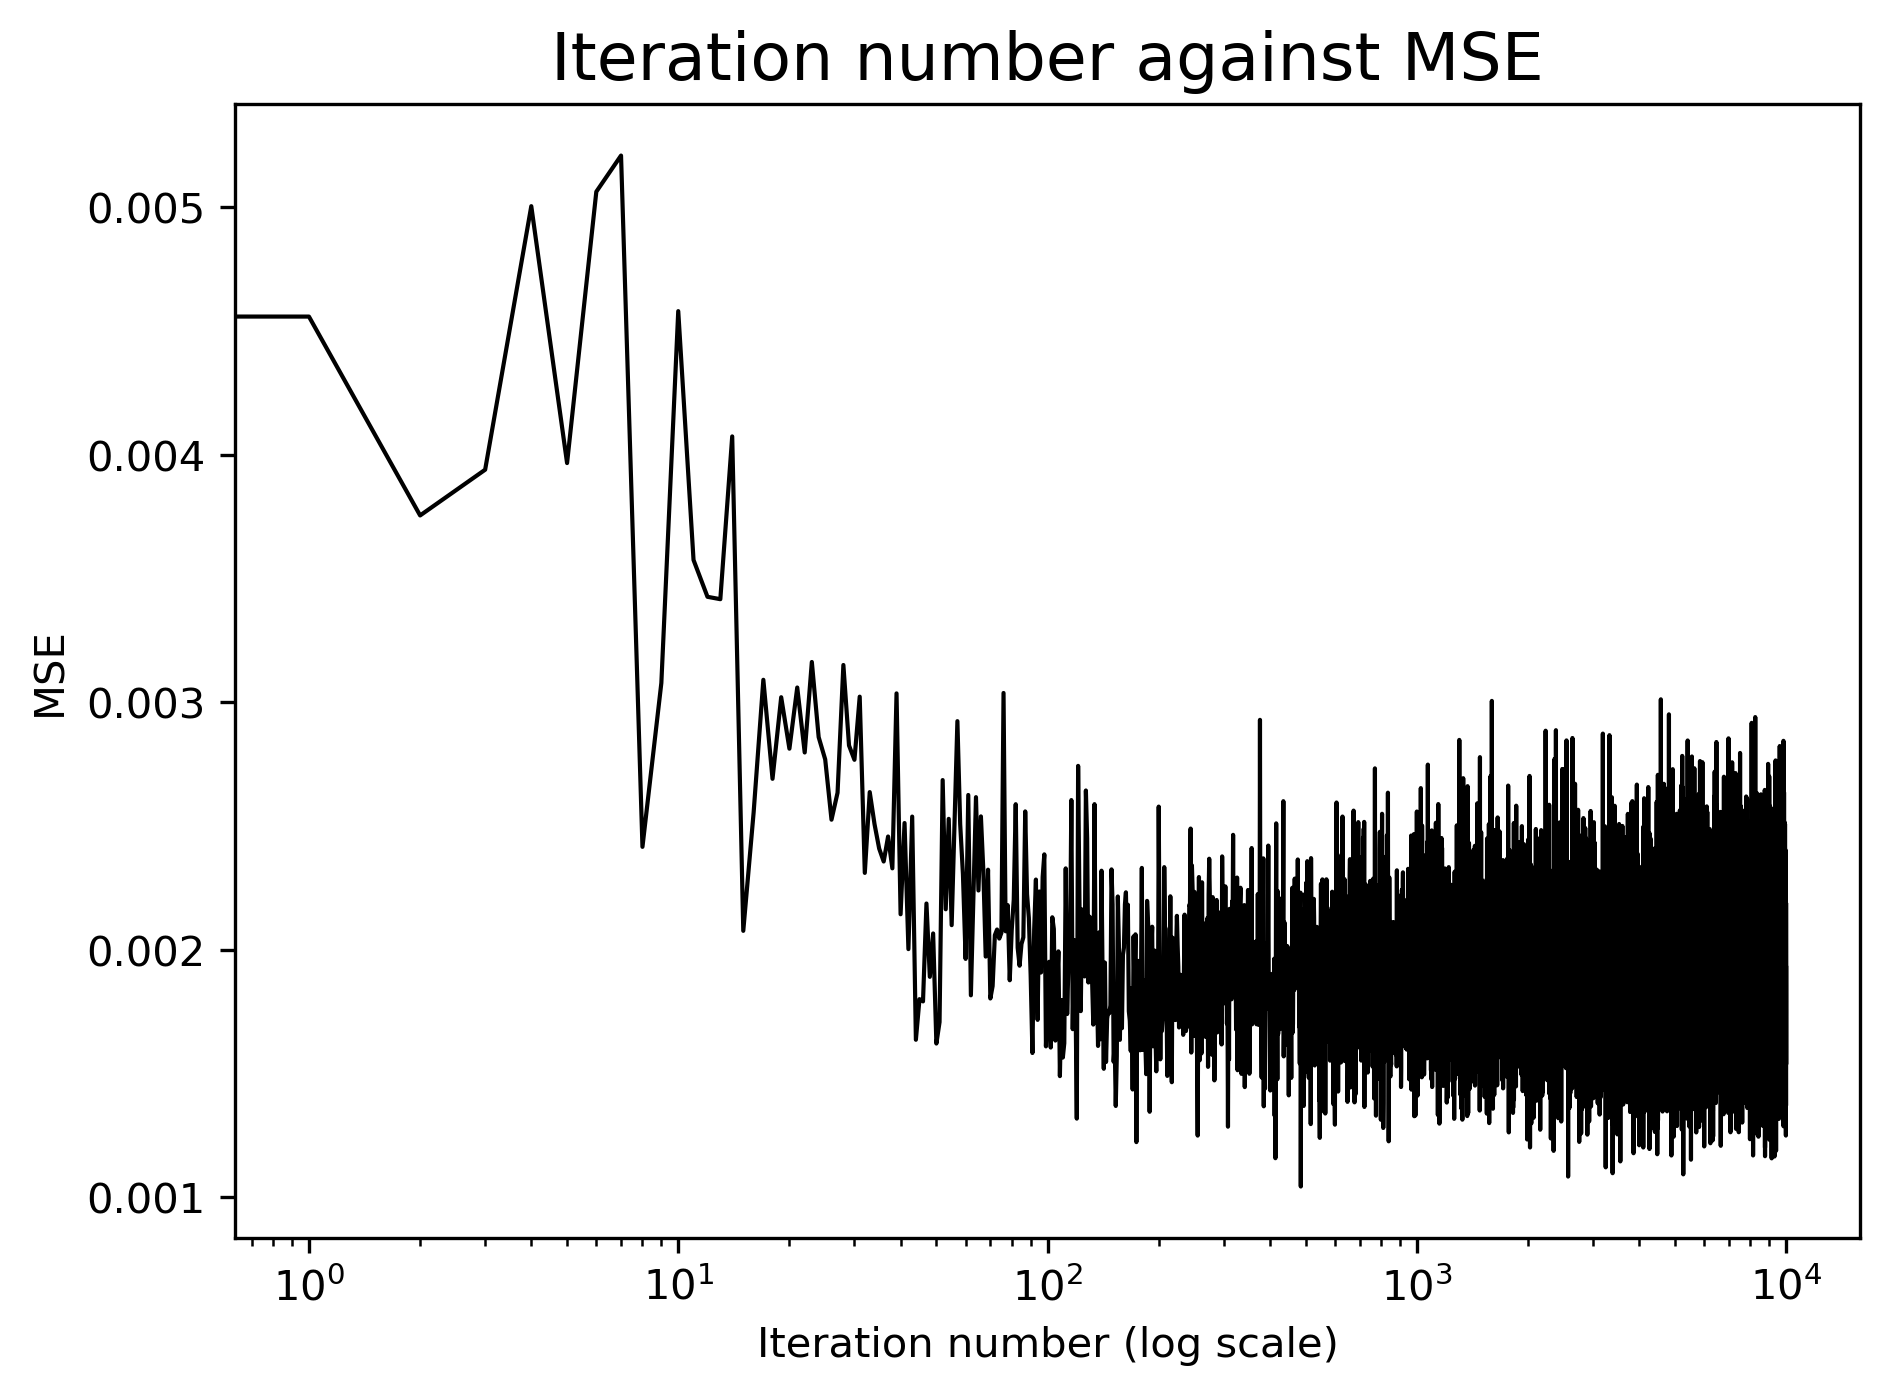

In [43]:
plot_mse(experiment_results, GT, "Iteration number against MSE (Adam OAIS)", xlog=True)
plt.title("Iteration number against MSE", fontsize=16)
plt.savefig("/Users/carlosperello/Desktop/M3R/figs/beta/Adam/mse.png")